In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))


In [ ]:
import xgboost as xgb
#from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df_GPU=pd.read_csv('FACT_GPU_PRICE.csv')
df_GPU['Date']=pd.to_datetime(df_GPU['TimeId'].astype(str), format="%Y%m%d")
df_GPU.set_index('Date', inplace=True)

df=df_GPU[df_GPU['ProdId']==1047]['Price_USD'].groupby('Date').mean()
#df_NVidia
df=df.iloc[3:]
df.reindex(pd.date_range('2016-06-10', '2018-03-16',freq='D'))

df=df.asfreq('D')
df.fillna(method='ffill', inplace=True)
df=pd.DataFrame(df)

In [ ]:
# Crypto - Ethereum
df_Crypto=pd.read_csv('FACT_CRYPTO_RATE.csv')
df_Crypto=df_Crypto[df_Crypto['CodeId']==6]
df_Crypto['Date']=pd.to_datetime(df_Crypto['TimeId'].astype(str), format="%Y%m%d")
df_Crypto.set_index('Date', inplace=True)
df_Crypto=df_Crypto.reindex(pd.date_range('2015-08-31', '2018-04-13'))
df_Crypto=df_Crypto['Close'].iloc[:-len(pd.date_range('2018-03-17','2018-04-13'))]
df_Crypto=pd.DataFrame(df_Crypto.iloc[-len(df):])
df_Crypto

,Close
2016-06-10,13.91
2016-06-11,14.19
2016-06-12,15.74
2016-06-13,17.60
2016-06-14,18.89
...,...
2018-03-12,699.83
2018-03-13,690.83
2018-03-14,614.29
2018-03-15,611.30


<AxesSubplot:xlabel='Date'>

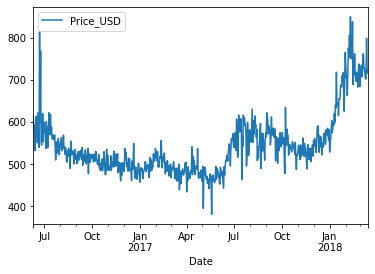

In [ ]:
df.plot()

In [ ]:
df1=df.diff().dropna()

<AxesSubplot:xlabel='Date'>

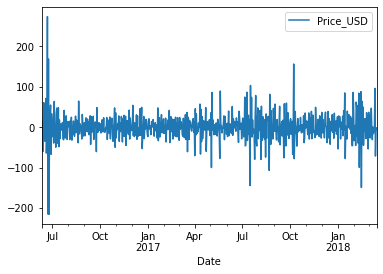

In [ ]:
df1.plot()

In [ ]:
n_shifts=7
df1['eth-7']=df_Crypto['Close'].diff().shift(7)
df1['eth-1']=df_Crypto['Close'].diff().shift(1)
for i in range(n_shifts,0,-1):
    print(i)
    df1['t- ' + str(i)]=df1['Price_USD'].shift(i)

7
6
5
4
3
2
1


In [ ]:
df1

,Price_USD,eth-7,eth-1,t- 7,t- 6,t- 5,t- 4,t- 3,t- 2,t- 1
Date,,,,,,,,,,
2016-06-11,-34.211651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-12,13.908655,NaN,0.28,NaN,NaN,NaN,NaN,NaN,NaN,-34.211651
2016-06-13,-60.458302,NaN,1.55,NaN,NaN,NaN,NaN,NaN,-34.211651,13.908655
2016-06-14,19.756014,NaN,1.86,NaN,NaN,NaN,NaN,-34.211651,13.908655,-60.458302
2016-06-15,60.740151,NaN,1.29,NaN,NaN,NaN,-34.211651,13.908655,-60.458302,19.756014
...,...,...,...,...,...,...,...,...,...,...
2018-03-12,0.572977,-13.00,36.45,6.669438,47.132080,-4.444620,-30.705982,0.594386,-15.693388,-9.549022
2018-03-13,96.214574,-36.73,-23.51,47.132080,-4.444620,-30.705982,0.594386,-15.693388,-9.549022,0.572977
2018-03-14,-71.358926,-64.12,-9.00,-4.444620,-30.705982,0.594386,-15.693388,-9.549022,0.572977,96.214574


In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1

,Price_USD,eth-7,eth-1,t- 7,t- 6,t- 5,t- 4,t- 3,t- 2,t- 1
Date,,,,,,,,,,
2016-06-18,-23.961696,0.28,-5.21,-34.211651,13.908655,-60.458302,19.756014,60.740151,-3.854464,-34.599369
2016-06-19,71.212684,1.55,-4.05,13.908655,-60.458302,19.756014,60.740151,-3.854464,-34.599369,-23.961696
2016-06-20,-64.022050,1.86,0.90,-60.458302,19.756014,60.740151,-3.854464,-34.599369,-23.961696,71.212684
2016-06-21,-17.633596,1.29,-0.39,19.756014,60.740151,-3.854464,-34.599369,-23.961696,71.212684,-64.022050
2016-06-22,273.864215,-0.54,1.47,60.740151,-3.854464,-34.599369,-23.961696,71.212684,-64.022050,-17.633596
...,...,...,...,...,...,...,...,...,...,...
2018-03-12,0.572977,-13.00,36.45,6.669438,47.132080,-4.444620,-30.705982,0.594386,-15.693388,-9.549022
2018-03-13,96.214574,-36.73,-23.51,47.132080,-4.444620,-30.705982,0.594386,-15.693388,-9.549022,0.572977
2018-03-14,-71.358926,-64.12,-9.00,-4.444620,-30.705982,0.594386,-15.693388,-9.549022,0.572977,96.214574


In [ ]:
X=df1.iloc[:,1:].values
X.shape


(637, 9)

In [ ]:
Y=df1.iloc[:,0].values

In [ ]:
Y

array([-2.39616963e+01,  7.12126842e+01, -6.40220502e+01, -1.76335965e+01,
        2.73864215e+02, -2.15023461e+02,  1.68952375e+02, -2.15651406e+02,
       -6.84235526e+00,  2.00371298e+01,  5.49258275e+01, -6.70011928e+01,
        3.33455156e+01,  1.30419877e+01, -2.31202971e+01, -6.31094692e-02,
       -3.91190097e+01,  6.37232816e+01, -1.65179885e+01,  4.45319960e+00,
       -4.93981934e+01,  3.46875382e+01,  4.76515111e+01, -1.23021942e+01,
       -3.96842578e+01,  4.81917849e+01, -4.81059040e+01,  1.79647562e+01,
       -2.81393295e+01,  1.14077649e+00,  8.22557138e+00, -7.19664589e+00,
       -4.44896678e+00,  1.16908017e+01, -2.83148040e+01, -3.11715377e+01,
        4.17301975e+01,  1.47639332e+00, -2.68561930e+01,  6.42415702e+00,
        2.82858480e+01, -8.44384222e+00, -3.02925669e+01,  1.35164472e+01,
        1.16802438e+01,  1.38796803e+00,  1.40074947e+01, -3.04573317e+01,
        1.58205117e+01, -3.81050807e+00,  2.47717761e+01, -3.19461436e+01,
        3.78239961e+00, -

In [ ]:
nSplit=int(len(X)*0.8)-30
nSplit

479

In [ ]:
#Ytrain, Ytest=Y[0:nSplit],Y[nSplit:-30]
#Xtrain, Xtest=X[0:nSplit,:],X[nSplit:-30,:]


from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X[:-30, :], Y[:-30], test_size=0.2, random_state=42)

Y_for_pred=Y[-30:]
X_for_pred=X[-30:,:]
df_test=df.iloc[-30:]
print(len(df_test), len(Ytest), len(df), len(Ytrain))

30 122 645 485


In [ ]:
Xtrain.shape

(485, 9)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200)

In [ ]:
rfr.fit(Xtrain, Ytrain)

RandomForestRegressor(n_estimators=200)

In [ ]:
print(rfr.score(Xtrain, Ytrain))
print(rfr.score(Xtest, Ytest))

0.8977303213421235
0.13309353670128843


In [ ]:
train_prediction=rfr.predict(Xtrain)
test_prediction=rfr.predict(Xtest)

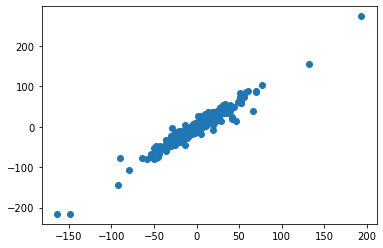

In [ ]:
plt.scatter(train_prediction, Ytrain, label='Train')
plt.show()

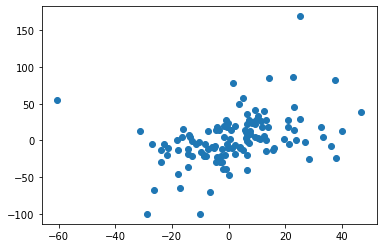

In [ ]:
plt.scatter(test_prediction, Ytest, label='Test')
plt.show()

In [ ]:
from sklearn.model_selection import ParameterGrid
grid={'n_estimators' : [200], 'max_depth' : [2,3,4,5,6,7,8,9,10], 'max_features' : range(2,9), 'random_state' : [17,18,19]}
# features are these "past values", that we use for predictions

In [ ]:
rfr=RandomForestRegressor()
test_scores=[]
for g in ParameterGrid(grid):
    rfr.set_params(**g)
    rfr.fit(Xtrain, Ytrain)
    
    test_prediction=rfr.predict(X_for_pred)
    true_pred=np.empty(0)
    true_pred=np.array([df.iloc[-len(X_for_pred)-1]+Ytest[0]])
    for i in range(1, len(X_for_pred)):
            true_pred=np.append(true_pred,true_pred[-1]+test_prediction[i])
            mape=mean_absolute_percentage_error(df.iloc[-len(X_for_pred):].values, true_pred)
    #print(mape)
    test_scores.append(mape)
    #test_scores.append(rfr.score(Xtest, Ytest))

In [ ]:
best_idx=np.argmin(test_scores)
best_idx

2

In [ ]:
test_scores[best_idx]

0.24354083238932248

In [ ]:
ParameterGrid(grid)[best_idx]

{'random_state': 19, 'n_estimators': 200, 'max_features': 2, 'max_depth': 2}

In [ ]:
rfr=RandomForestRegressor(random_state=19, n_estimators=200, max_features=2, max_depth=2)
rfr.fit(Xtrain, Ytrain)
print(rfr.score(Xtrain, Ytrain))
print(rfr.score(Xtest, Ytest))
#train_prediction=rfr.predict(Xtrain)
test_prediction=rfr.predict(X_for_pred)

0.21082452185051603
0.06649396641358563


In [ ]:
true_pred=np.array([df.iloc[-len(X_for_pred)-1]+Ytest[0]])
for i in range(1, len(X_for_pred)):
        true_pred=np.append(true_pred,true_pred[-1]+test_prediction[i])
df_test['rfr'] = true_pred
print(f'MAPE = {mean_absolute_percentage_error(df.iloc[-len(X_for_pred):].values, true_pred)}')  

MAPE = 0.24354083238932248


<ipython-input-76-afa1145afd50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['rfr'] = true_pred


In [ ]:
feature_importanceRFR=rfr.feature_importances_

In [ ]:
sorted_index=np.argsort(feature_importanceRFR)[::-1]
x1=range(len(feature_importanceRFR))
feature_names=df1.columns.tolist()[1:]
labels=np.array(feature_names)[sorted_index]

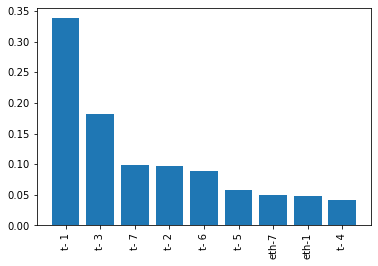

In [ ]:
plt.bar(x1, feature_importanceRFR[sorted_index], tick_label=labels)
plt.xticks(rotation=90);

### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_features=4, learning_rate=0.1, n_estimators=500, subsample=0.6, random_state=99)
gbr.fit(Xtrain, Ytrain)
print(gbr.score(Xtrain, Ytrain))
print(gbr.score(Xtest, Ytest))
train_prediction=gbr.predict(Xtrain)
test_prediction=gbr.predict(Xtest)

0.9860890986176997
0.09401356986335252


In [ ]:
from sklearn.model_selection import ParameterGrid
grid={'n_estimators' : [500], 'learning_rate' : [0.05, 0.1, 0.5, 1], 'subsample' : [.4, .5, .6, .7, .8, .9, 1.], 'max_features' : range(2, 9), 'random_state' : [17]}


gbr=GradientBoostingRegressor()
test_scores=[]
for g in ParameterGrid(grid):
    gbr.set_params(**g)
    gbr.fit(Xtrain, Ytrain)
    
    test_prediction=gbr.predict(X_for_pred)
    true_pred=np.empty(0)
    true_pred=np.array([df.iloc[-len(X_for_pred)-1]+Ytest[0]])
    for i in range(1, len(X_for_pred)):
            true_pred=np.append(true_pred,true_pred[-1]+test_prediction[i])
            mape=mean_absolute_percentage_error(df.iloc[-len(X_for_pred):].values, true_pred)
    #print(mape)
    test_scores.append(mape)
    #test_scores.append(gbr.score(Xtest, Ytest))

In [ ]:
best_idx=np.argmin(test_scores)
print(f'best score: {test_scores[best_idx]}')
ParameterGrid(grid)[best_idx]

best score: 0.07068754784978583


{'subsample': 0.9,
 'random_state': 17,
 'n_estimators': 500,
 'max_features': 6,
 'learning_rate': 1}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(max_features=6, learning_rate=0.1, n_estimators=500, subsample=.9, random_state=17)
gbr.fit(Xtrain, Ytrain)
print(gbr.score(Xtrain, Ytrain))
print(gbr.score(Xtest, Ytest))
#train_prediction=gbr.predict(Xtrain)
test_prediction=gbr.predict(X_for_pred)

0.9911197811604245
0.11103134608102438


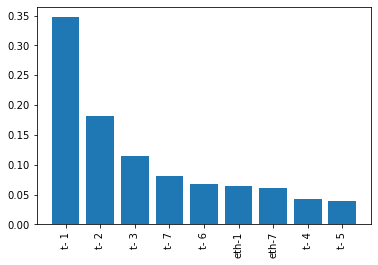

In [ ]:
feature_importanceGBR=gbr.feature_importances_
sorted_index=np.argsort(feature_importanceGBR)[::-1]
x1=range(len(feature_importanceGBR))
feature_names=df1.columns.tolist()[1:]
labels=np.array(feature_names)[sorted_index]
plt.bar(x1, feature_importanceGBR[sorted_index], tick_label=labels)
plt.xticks(rotation=90);

In [ ]:
true_pred=np.array([df.iloc[-len(X_for_pred)-1]+Ytest[0]])
for i in range(1, len(X_for_pred)):
        true_pred=np.append(true_pred,true_pred[-1]+test_prediction[i])
df_test['gbr'] = true_pred
print(f'MAPE = {mean_absolute_percentage_error(df.iloc[-len(X_for_pred):].values, true_pred)}')  

MAPE = 0.4154105120349022


<ipython-input-93-152f43347ac0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['gbr'] = true_pred


<AxesSubplot:xlabel='Date'>

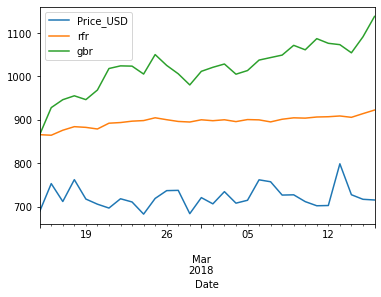

In [ ]:
df_test.plot()